# Project WeRateDogs: Wrangling and Analyze Data

## Data Gathering

1. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

twitter_archive_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

2. Used the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#save HTML to TSV file
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

#read file as DataFrame
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Used the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import json

# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []

with open('tweet_json.txt') as file:
    
    #iterate through each line in the open file
    for line in file:
        tweet = file.readline()
    
        #convert txt to dictionary
        dict_tweet = json.loads(tweet)
    
        tweet_ID = dict_tweet.get('id')
        retweet_count = dict_tweet.get('retweet_count')
        favorite_count = dict_tweet.get('favorite_count')
    
        #Append to list of dictionaries
        df_list.append({'tweet_ID' : tweet_ID,
                     'retweet_count' : retweet_count,
                     'favorite_count' : favorite_count})

#convert list into dataframe
tweet = pd.DataFrame(df_list, columns = ['tweet_ID','retweet_count','favorite_count'])

## Assessing Data


In [4]:
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [5]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,Norwich_terrier,0.419838,True,cairn,0.351876,True,Norfolk_terrier,0.051094,True
112,667911425562669056,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,1,frilled_lizard,0.257695,False,ox,0.235160,False,triceratops,0.085317,False
1727,820446719150292993,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True


In [6]:
tweet.sample(3)

,tweet_ID,retweet_count,favorite_count
669,704847917308362754,1727,5594
1125,667793409583771648,358,736
941,674793399141146624,1225,2697


### Quality issues
1. `twitter_archive_enhanced` table - some missing dog name

2. `twitter_archive_enhanced` table - timestamp column is object

3. `twitter_archive_enhanced` table - retweeted_status_timestamp column is object

4. `twitter_archive_enhanced` table - some missing dog type

5. `twitter_archive_enhanced` table - some dog names are articles(a,an,the)

6. `twitter_archive_enhanced` table - some rating_numerators are far greater than 10 (e.g 1776, 960, 666, etc)

7. `twitter_archive_enhanced` table - some rating_denominators are far greater than 10 (e.g 170, 150, 130, etc)

8. `twitter_archive_enhanced` table - some expanded_urls are not twitter domain names(e.g with tweet_id = 890971913173991426	)

9. `image_predictions` table - lower case given names of predictions(p1,p2 & p3)

10. `image_predictions` table - some predicitons are objects(p1,p2 & p3)

11. `tweet` table - some favorite_count are 0s in comparison to their retweet count(e.g with tweet_id = 776819012571455488)


### Tidiness issues
1. `image_prediction` table - Some column headers are values and not variable names (p1, p2, p3)

2. `twitter_archive_enhanced` table - One variable in Four columns (doggo, floofer, pupper, puppo)



## Cleaning Data


In [7]:
# Make copies of original pieces of data
image_predictions_clean = image_predictions.copy()
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
tweet_clean = tweet.copy()

### Issue #1:

#### Define:
<ul><li>remove all retweet rows
    <li>drop these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
    <li>remove rows with missing dog names
    <li>change all timestamp datatype to datetime
    <li>reduce the 4 columns(doggo, floffer, pupper, puppo) to 1 column
    <li>drop rows with missing dog type
    <li>divide numerator and denominator rating and put result in one column

    


#### Define
remove all retweet rows and drop the retweet-related columns

#### Code

In [8]:
#subset the dataframe where retweeted_status_id is null
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['retweeted_status_id'].isnull()]

#remove replies to original tweets where in_reply_to_status_id is null
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['in_reply_to_status_id'].isnull()]

In [9]:
#drop the retweet-related columns
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('retweeted_status_id', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('retweeted_status_user_id', axis=1)

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('retweeted_status_timestamp', axis=1)

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('in_reply_to_status_id', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('in_reply_to_user_id', axis=1)

#### Test

In [10]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Define
replace the anchor tag with the text under the source column in the twitter_archive_enhanced table

#### Code

In [11]:
#function to correct source column in twitter_archive_enhanced table
def source_corr(x):
    if x == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' :
        return 'iPhone'
    elif x == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' :
        return 'Vine-Make a Scene'
    elif x == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' :
        return 'Web-Client' 
    elif x == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' :
        return 'Tweet-Deck'     
    else:
        return 'Unkwown'

#apply function
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].apply(source_corr)

#### Test

In [12]:
twitter_archive_enhanced_clean.source.value_counts()

iPhone               1964
Vine-Make a Scene      91
Web-Client             31
Tweet-Deck             11
Name: source, dtype: int64

#### Define 
drop unwanted columns

#### Code

In [13]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('text', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('expanded_urls', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('name', axis=1)

#### Test

In [14]:
twitter_archive_enhanced_clean.head(3)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,13,10,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,iPhone,13,10,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,iPhone,12,10,None,None,None,None


#### Define
change timestamp column to dateframe datatype

#### Code

In [15]:
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

#### Test

In [16]:
twitter_archive_enhanced_clean.timestamp.dtypes

dtype('<M8[ns]')

#### Define
Reduce rating_numerator and rating_denominator to 1 column rating(i.e num/den)

#### Code

In [17]:
#divide the numerator by denominator and round up to 1d.p
twitter_archive_enhanced_clean['rating'] = round(twitter_archive_enhanced_clean['rating_numerator']/twitter_archive_enhanced_clean['rating_denominator'], 1)

#drop the numerator and denominator column
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('rating_numerator', axis=1)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('rating_denominator', axis=1)

#### Test

In [18]:
twitter_archive_enhanced_clean['rating'].head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

#### Define
reduce the 4 columns(doggo, floffer, pupper, puppo) to 1 column

In [19]:
#first re-arramge column order for clarity
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[['tweet_id','timestamp','source','rating','doggo','floofer','pupper','puppo']]

twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,rating,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,iPhone,1.3,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,iPhone,1.3,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,iPhone,1.2,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,iPhone,1.3,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,iPhone,1.2,None,None,None,None


#### Code

In [20]:
twitter_archive_enhanced_clean = pd.melt(twitter_archive_enhanced_clean, 
                                         id_vars=['tweet_id','timestamp','source','rating'], 
                                         value_name='dog_type')

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['dog_type']!='None']

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('variable', axis=1)

#### Test

In [21]:
twitter_archive_enhanced_clean.sample(10)

,tweet_id,timestamp,source,rating,dog_type
5934,672622327801233409,2015-12-04 03:43:54,iPhone,1.2,pupper
5752,677269281705472000,2015-12-16 23:29:14,iPhone,1.0,pupper
5028,743222593470234624,2016-06-15 23:24:09,iPhone,1.2,pupper
5639,681891461017812993,2015-12-29 17:36:07,iPhone,1.0,pupper
5308,705428427625635840,2016-03-03 16:23:38,iPhone,1.1,pupper
554,782747134529531904,2016-10-03 01:00:34,iPhone,1.1,doggo
5534,687704180304273409,2016-01-14 18:33:48,iPhone,0.9,pupper
4907,756939218950160384,2016-07-23 19:49:07,iPhone,1.2,pupper
5761,676936541936185344,2015-12-16 01:27:03,iPhone,0.8,pupper
6402,867421006826221569,2017-05-24 16:44:18,iPhone,1.2,puppo


#### Define
Change timestamp to datetime format and extract year, month and day

#### Code

In [22]:
#change datatype from string to datetime format
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

#Create new column to extract year, month & day
twitter_archive_enhanced_clean['year'] = twitter_archive_enhanced_clean['timestamp'].dt.year
twitter_archive_enhanced_clean['month'] = twitter_archive_enhanced_clean['timestamp'].dt.month_name()
twitter_archive_enhanced_clean['weekday'] =twitter_archive_enhanced_clean['timestamp'].dt.weekday_name


### Test

In [23]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,rating,dog_type,year,month,weekday
9,890240255349198849,2017-07-26 15:59:51,iPhone,1.4,doggo,2017,July,Wednesday
39,884162670584377345,2017-07-09 21:29:42,iPhone,1.2,doggo,2017,July,Sunday
86,872967104147763200,2017-06-09 00:02:31,iPhone,1.2,doggo,2017,June,Friday
94,871515927908634625,2017-06-04 23:56:03,iPhone,1.2,doggo,2017,June,Sunday
95,871102520638267392,2017-06-03 20:33:19,iPhone,1.4,doggo,2017,June,Saturday


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [24]:
twitter_archive_enhanced_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#import the cleaned dataset
df = pd.read_csv("twitter_archive_master.csv")

#define my color template
mycolor = sns.color_palette()[0]

##### It was noticed that PUPPER dogs had the most tweet while FLOOFER dogs had the least amount of tweets

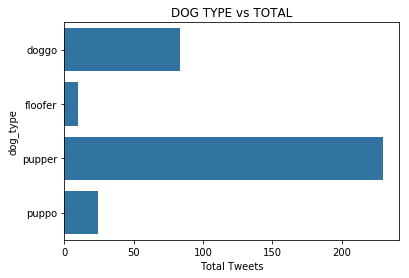

In [27]:
sns.countplot(data=df, y='dog_type', color=mycolor)
plt.title("DOG TYPE vs TOTAL")
plt.xlabel("Total Tweets");

##### It was observed that PUPPER that had the most tweet conversely had the LOWEST RATING while <br> PUPPER that was 2nd least tweeted had the best rating next to DOGGO

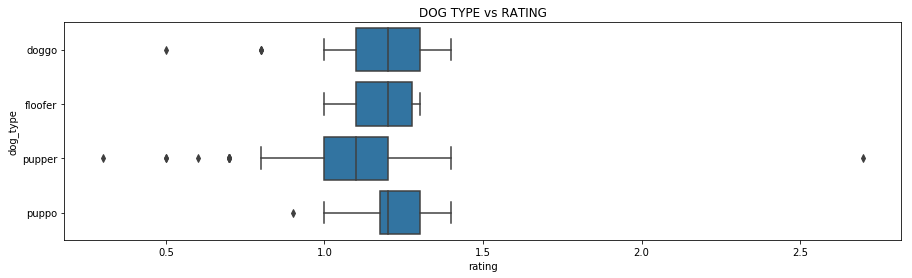

In [28]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x='rating', y='dog_type', color=mycolor)
plt.title("DOG TYPE vs RATING");

##### It was also noticed that of all the dog types, only PUPPER dog type was tweeted in the 1st year(2015).<br> Further insights proved that in 2016 DOGGO dog type had the most tweets but drastically dropped in 2017 while DOGGO dog type had the most tweets tweet in 2017

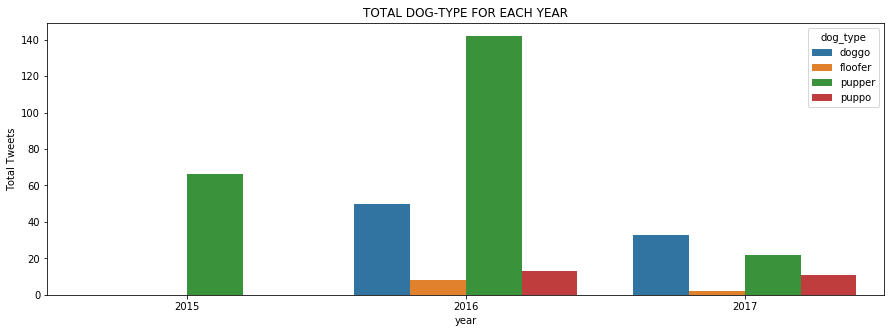

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='year', hue='dog_type')
plt.title("TOTAL DOG-TYPE FOR EACH YEAR")
plt.ylabel("Total Tweets");

##### It was also observed that most tweet were performed by iPhone users while the least tweet was performed on the website

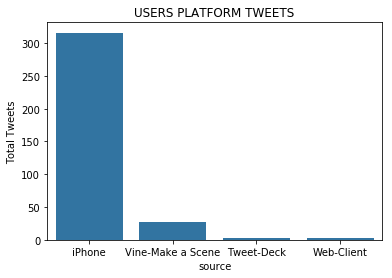

In [30]:
sns.countplot(data=df, x='source', color=mycolor)
plt.title("USERS PLATFORM TWEETS")
plt.ylabel("Total Tweets");

##### It was also observed that approximately 50% of all We Rate Dog tweets were done in December, January and February with the most tweet in the month of December with the least total tweets in the month of August

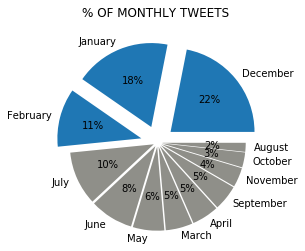

In [31]:
sorted_month = df['month'].value_counts()
explode = [0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
color = [mycolor,mycolor,mycolor,'#8f8f89','#8f8f89','#8f8f89',
          '#8f8f89','#8f8f89','#8f8f89','#8f8f89','#8f8f89','#8f8f89']

plt.pie(sorted_month, labels=sorted_month.index, startangle=0, 
            explode=explode, autopct='%.0f%%',
           colors=color)
plt.axis('square')
plt.title("% OF MONTHLY TWEETS");

##### I noticed that approximately 60% of all We Rate Dog tweets were made by users in the year 2016 with the remaining 40% shared almost equally between the previous year(2015) and the following year(2017)

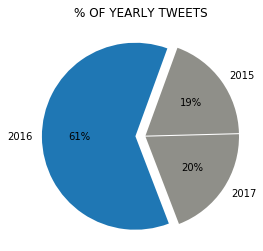

In [32]:
year = df.year.value_counts()
color = [mycolor,'#8f8f89','#8f8f89']
explode = [0.1,0.01,0.01]
plt.pie(year, labels=year.index, colors=color, autopct='%.0f%%', startangle=70, explode=explode)
plt.axis('square')
plt.title("% OF YEARLY TWEETS");

##### Further insights into each year's demography also confirms that iPhone Users tweeted the most all through the year, Website users only tweeted in 2017 while Tweet-Deck and Vine App Users tweeted in 2015 and 2016 and not in 2017

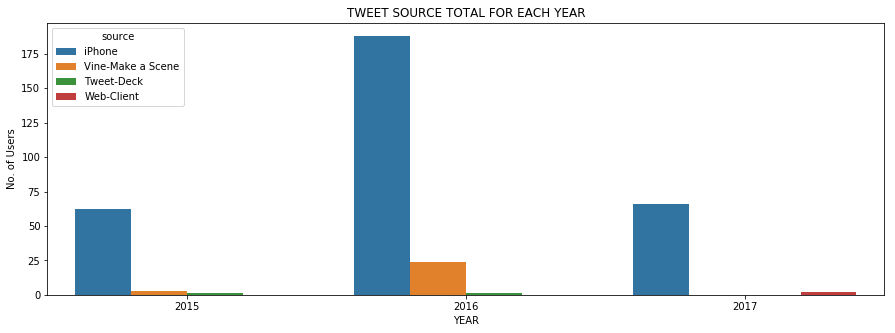

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='year', hue='source')
plt.xlabel('YEAR')
plt.ylabel("No. of Users")
plt.title("TWEET SOURCE TOTAL FOR EACH YEAR");

##### Analysis on frequency of tweets on daily basis proved that Fridays and Sundays had the lowest tweets amongst the 7 days of the week

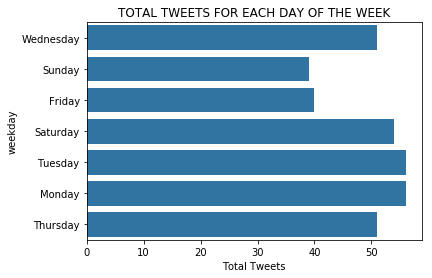

In [34]:
sns.countplot(data=df, y='weekday', color=mycolor)
plt.xlabel("Total Tweets")
plt.title("TOTAL TWEETS FOR EACH DAY OF THE WEEK");

##### ....................... THANK YOU ......................................